# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data")

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[134  19]
 [ 13 134]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       153
           1       0.88      0.91      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [22]:
# Create an empty list to store error rates for different values of 'n_neighbors'.
error_rate = []

# Iterate through a range of 'n_neighbors' values from 1 to 39.
for i in range(1, 40):
    # Create a KNN classifier with the current 'n_neighbors' value.
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the KNN classifier on the training data.
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data.
    pred_i = knn.predict(X_test)
    
    # Calculate the error rate by comparing predicted labels to true labels and taking the mean.
    error_rate.append(np.mean(pred_i != y_test))


 != y_test))
```

In this code:

- A loop iterates through values of `n_neighbors` from 1 to 39, inclusive.

- For each value of `n_neighbors`, a KNN classifier (`knn`) is created with that specific number of neighbors.

- The `knn` classifier is trained on the training data (`X_train` and `y_train`) using the `fit` method.

- Predictions (`pred_i`) are made on the test data (`X_test`) using the trained classifier.

- The error rate is calculated by comparing the predicted labels to the true labels (`y_test`) and taking the mean. The error rate represents the fraction of incorrect predictions.

- The calculated error rate for each value of `n_neighbors` is appended to the `error_rate` list.

After running this code, you'll have a list of error rates for different values of `n_neighbors`, which can be used for further analysis and visualization, such as finding the optimal number of neighbors for your KNN model.

Text(0, 0.5, 'Error Rate')

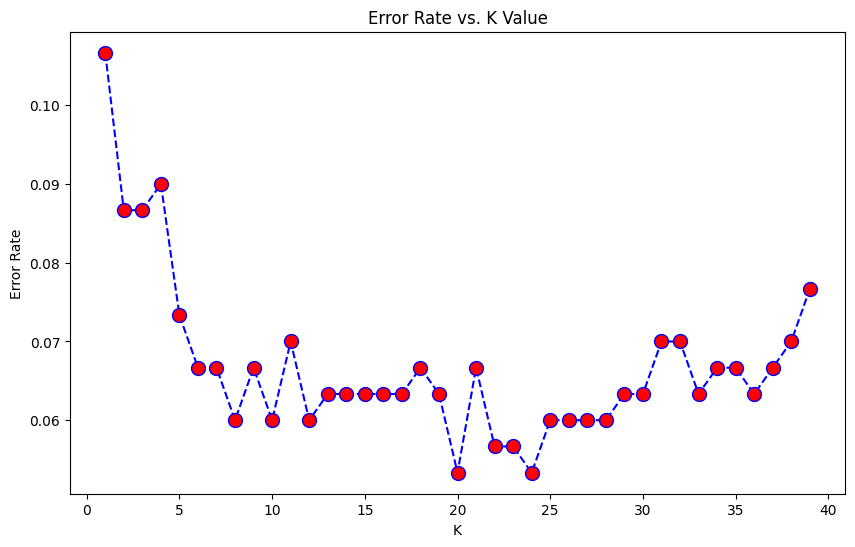

In [23]:
# Create a figure for plotting with a specified size.
plt.figure(figsize=(10, 6))

# Plot the error rate as a function of 'K'.
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# Set the title and labels for the plot.
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In this code:

- `plt.figure(figsize=(10, 6))` creates a figure for the plot with a specified size of 10x6 inches.

- `plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)` plots the error rate on the y-axis and the number of neighbors (`K`) on the x-axis. The plot uses a blue line with red markers ('o') to represent the data points. The markers are highlighted with red color and have a size of 10.

- `plt.title('Error Rate vs. K Value')` sets the title of the plot.

- `plt.xlabel('K')` and `plt.ylabel('Error Rate')` set labels for the x-axis and y-axis, respectively.

This code produces a visual representation of how the error rate changes with different values of `K`. Typically, you would look for the value of `K` with the lowest error rate, as it indicates the optimal number of neighbors for your KNN classifier.

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [25]:
# Create a KNN classifier with 'n_neighbors=1'.
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the KNN classifier on the training data.
knn.fit(X_train, y_train)

# Make predictions on the test data.
pred = knn.predict(X_test)

# Print the results for K=1.
print('WITH K=1')
print('\n')

# Print the confusion matrix to evaluate the model's performance.
print(confusion_matrix(y_test, pred))
print('\n')

# Print a classification report providing metrics like precision, recall, and F1-score.
print(classification_report(y_test, pred))


WITH K=1


[[134  19]
 [ 13 134]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       153
           1       0.88      0.91      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [26]:
# Create a KNN classifier with 'n_neighbors=1'.
knn = KNeighborsClassifier(n_neighbors=23)

# Fit the KNN classifier on the training data.
knn.fit(X_train, y_train)

# Make predictions on the test data.
pred = knn.predict(X_test)

# Print the results for K=1.
print('WITH K=23')
print('\n')

# Print the confusion matrix to evaluate the model's performance.
print(confusion_matrix(y_test, pred))
print('\n')

# Print a classification report providing metrics like precision, recall, and F1-score.
print(classification_report(y_test, pred))


WITH K=23


[[138  15]
 [  2 145]]


              precision    recall  f1-score   support

           0       0.99      0.90      0.94       153
           1       0.91      0.99      0.94       147

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



(y_test, pred))
```

In this code:

- `KNeighborsClassifier(n_neighbors=1)` creates a KNN classifier with `n_neighbors=1`, indicating that it considers only the nearest single neighbor for making predictions.

- `knn.fit(X_train, y_train)` fits the KNN classifier on the training data.

- `knn.predict(X_test)` makes predictions on the test data.

- `confusion_matrix(y_test, pred)` calculates and prints the confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives.

- `classification_report(y_test, pred)` prints a classification report that provides metrics such as precision, recall, F1-score, and support for each class in the dataset. This report gives a comprehensive evaluation of the model's performance.

By printing these metrics, you can assess how well the KNN classifier with `n_neighbors=1` performs on the test data.rt(y_test, pred))


# Great job!

We were able to squeeze some more performance out of our model by tuning to a better K value!